# 로지스틱 회귀 (Logistic Regression)

### 참(True), 거짓(False)의 판단

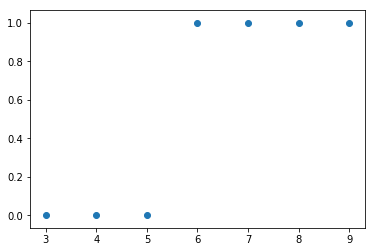

In [5]:
import numpy as np
import matplotlib.pyplot as plt

scores = [3,4,5,6,7,8,9]
judges= [0,0,0,1,1,1,1]

plt.scatter(scores,judges, marker='o')
plt.show()

### 1) 시그모이드 함수 (Sigmoid Function) 

#### 참,거짓의 판단
결국 sigmoid함수 내의 기울기 a와 절편 b를 구하는 것이 관건

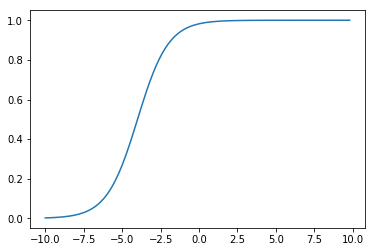

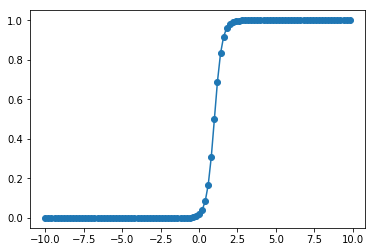

In [138]:
import math

# 시그모이드 함수 
def sigmoid(a, x, b):
    arr = []
    for item in x:
        arr.append(1/(1+math.exp(-item*a + b)))
    return arr

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10., 10., 0.2)
a = 1
b = -4
sig = sigmoid(a, x, b)
plt.plot(x,sig)
plt.show()

a = 4
b = 4
sig = sigmoid(a, x, b)
plt.plot(x,sig, marker='o')
plt.show()

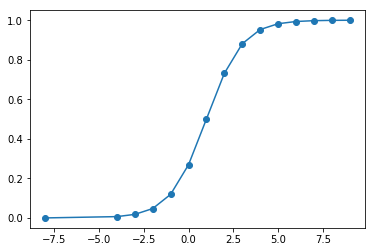

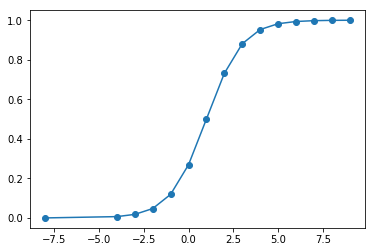

In [142]:
import numpy as np
import math
import matplotlib.pyplot as plt

def sigmoid(a,x,b):
    return 1/(1+np.e**(a*x + b))

def sigmoids(a,xarray,b):
    rtn = []
    for x in xarray:
        rtn.append(1/(1+np.e**(-a*x + b)))
    return rtn


def sigmoids2(a,xarray,b):
    rtn = []
    for x in xarray:
        rtn.append(1/(1+math.exp(-a*x + b)))
    return rtn


scores = [ -8,-4,-3,-2,-1,0,1,2, 3,4,5,6,7,8,9]
a = 1
b = 1
judges = sigmoids(a,scores,b)

plt.plot(scores,judges, marker='o')
plt.show()


judges = sigmoids2(a,scores,b)

plt.plot(scores,judges, marker='o')
plt.show()

### 2) 로그 함수

#### 오차 계산

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log


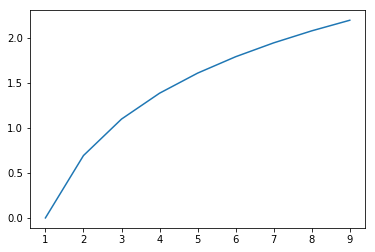

In [154]:
import numpy as np
import matplotlib.pyplot as plt

scores = [1,2, 3,4,5,6,7,8,9]
logs = np.log(scores)


plt.plot(scores,logs)
plt.show()

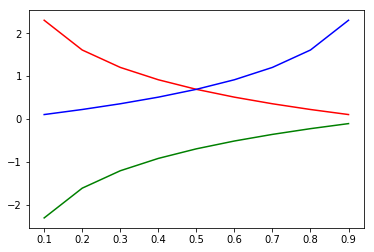

In [184]:
import numpy as np
import matplotlib.pyplot as plt

def log2(harr):
    arr = []
    for h in harr:
        arr.append( -np.log(1-h))
    return arr


scores = [0.1,0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9]

logs0 = np.log(scores)
logs1 = -np.log(scores)
logs2 = log2(scores)

plt.plot(scores,logs0, color="g")
plt.plot(scores,logs1, color="r")
plt.plot(scores,logs2, color="b")
plt.show()

## 로지스틱 회귀 Tensorflow

Epoch 0, loss=1.2676, 기울기 a=0.1849, 절편 b=-0.4334
Epoch 6000, loss=0.0152, 기울기 a=-2.9211, 절편 b=20.2982
Epoch 12000, loss=0.0081, 기울기 a=-3.5637, 절편 b=24.8010
Epoch 18000, loss=0.0055, 기울기 a=-3.9557, 절편 b=27.5463
Epoch 24000, loss=0.0041, 기울기 a=-4.2380, 절편 b=29.5231
Epoch 30000, loss=0.0033, 기울기 a=-4.4586, 절편 b=31.0676
Epoch 36000, loss=0.0028, 기울기 a=-4.6396, 절편 b=32.3346
Epoch 42000, loss=0.0024, 기울기 a=-4.7930, 절편 b=33.4086
Epoch 48000, loss=0.0021, 기울기 a=-4.9261, 절편 b=34.3406
Epoch 54000, loss=0.0019, 기울기 a=-5.0436, 절편 b=35.1636
Epoch 60000, loss=0.0017, 기울기 a=-5.1489, 절편 b=35.9005
소요시간:  14.5005 s.


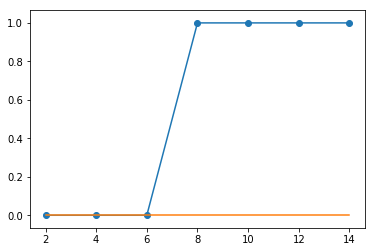

In [204]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time

scores = [2,4,6,8,10,12,14]
judges= [0,0,0,1,1,1,1]

# 구하고자 하는 기울기 a 변수 선언 및 난수값 할당
a = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed=0))

# 구하고자 하는 절편 b 변수 선언 및 난수값 할당
b = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed=0))

# 시그모이드 함수 방정식
y = 1/(1 + np.e**(a * scores + b))

# loss함수 정의
loss = -tf.reduce_mean(np.array(judges) * tf.log(y) + (1 - np.array(judges)) * tf.log(1-y))

# 학습률
learning_rate = 0.5

# loss를 최소화하는 최적화 함수 (경사하강법) 정의
gradient_descent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)


start_time = time.time()



def sigmoid(a, x, b):
    arr = []
    for item in x:
        arr.append(1/(1+math.exp(-item*a + b)))
    return arr


# 학습
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(60001):
        sess.run(gradient_descent)
        
        if i % 6000 == 0:
            print("Epoch %.f, loss=%.4f, 기울기 a=%.4f, 절편 b=%.4f" % (i,sess.run(loss), sess.run(a), sess.run(b)))
        
    print("소요시간: " , round(time.time() - start_time, 4), "s.")

    plt.scatter(scores,judges)
    plt.plot(scores,judges)
    plt.plot(scores, sigmoid(sess.run(a),scores,sess.run(b)))
    plt.show()